<a href="https://colab.research.google.com/github/Joudmoq/IT326-LiverDisease-Prediction/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##-***DATA ANALYSIS***

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency
from IPython.display import HTML,display
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px




url = "https://drive.google.com/uc?id=1UxauK7AdEE2VdCvHqqXvVogOmCGskNtm"

df = pd.read_csv(url)



In [11]:
round(df[['Age','BMI','AlcoholConsumption','PhysicalActivity','LiverFunctionTest']].describe().T[['min', '25%', '50%', '75%', 'max']],2)


,min,25%,50%,75%,max
Age,20.00,35.00,51.00,66.00,80.00
BMI,15.00,21.46,27.93,33.96,39.99
AlcoholConsumption,0.00,4.84,9.83,14.87,19.95
PhysicalActivity,0.00,2.62,5.02,7.40,9.99
LiverFunctionTest,20.02,40.02,59.51,79.43,99.99


The five-number summary provides an overview of the dataset’s distribution across different numerical attributes.

For Age, the values range from 20 to 80 years, with a median of 51, showing that the participants are generally middle-aged, and the spread across quartiles (35–66) suggests a balanced distribution without extreme outliers.

The BMI ranges from 15 to about 40, covering underweight to obese categories, with a median of 27.9, indicating that many participants fall in the overweight range.

 Alcohol Consumption varies from 0 to nearly 20 units, with a median of 9.8; and inclusion of zero values point to a mix of non-drinkers and heavy drinkers.

 Physical Activity scores range from 0 to 9.9, with a median of 5.0, suggesting that while some participants are inactive, most fall in the moderate range of activity.

 Finally, the Liver Function Test values range from 20.0 to 99.9, with a median of 59.5; the wide spread indicates variation in liver health.

In [12]:
Q1 = df[['Age','BMI','AlcoholConsumption','PhysicalActivity','LiverFunctionTest']].quantile(0.25)
Q3 = df[['Age','BMI','AlcoholConsumption','PhysicalActivity','LiverFunctionTest']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[['Age','BMI','AlcoholConsumption','PhysicalActivity','LiverFunctionTest']] < (Q1 - 1.5 * IQR)) | (df[['Age','BMI','AlcoholConsumption','PhysicalActivity','LiverFunctionTest']] > (Q3 + 1.5 * IQR)))
outliers.sum()

,0
Age,0
BMI,0
AlcoholConsumption,0
PhysicalActivity,0
LiverFunctionTest,0


It appears that the dataset does not contain any outliers.

In [13]:
desc = df.describe().T.round(2)
display(desc)

,count,mean,std,min,25%,50%,75%,max
Age,1700.0,50.39,17.64,20.00,35.00,51.00,66.00,80.00
Gender,1700.0,0.50,0.50,0.00,0.00,1.00,1.00,1.00
BMI,1700.0,27.70,7.21,15.00,21.46,27.93,33.96,39.99
AlcoholConsumption,1700.0,9.83,5.76,0.00,4.84,9.83,14.87,19.95
Smoking,1700.0,0.29,0.45,0.00,0.00,0.00,1.00,1.00
GeneticRisk,1700.0,0.52,0.67,0.00,0.00,0.00,1.00,2.00
PhysicalActivity,1700.0,5.00,2.85,0.00,2.62,5.02,7.40,9.99
Diabetes,1700.0,0.14,0.35,0.00,0.00,0.00,0.00,1.00
Hypertension,1700.0,0.15,0.36,0.00,0.00,0.00,0.00,1.00
LiverFunctionTest,1700.0,59.86,23.00,20.02,40.02,59.51,79.43,99.99


The statistical summary provides insights into the central tendency and variability of the dataset:

	•	Age: The ages of participants range from 20 to 80 years, with a mean of 50.39 and a median of 51. This indicates that most participants are middle-aged, with a fairly balanced distribution across quartiles (Q1 = 35, Q3 = 66).

	•	BMI: Body Mass Index values vary from 15.0 to 40.0, with a mean of 27.70 and a median of 27.93. This suggests that many individuals fall in the overweight category, as the average BMI is above the normal weight range.

	•	Alcohol Consumption: Alcohol intake ranges from 0 to almost 20 units per week, with a mean of 9.83 and a median of 9.58. The values suggest that the dataset contains both non-drinkers (minimum = 0) and heavy drinkers (maximum close to 20).

	•	Physical Activity: Scores range from 0 to 10 hours per week, with a mean of 4.08 and a median of 4.08. This implies that most individuals engage in low-to-moderate levels of physical activity.

	•	Liver Function Test: The test values range from 20.02 to 99.99, with a mean of 59.86 and a median of 59.51. The wide spread indicates a diverse distribution of liver health conditions across patients.

	•	Binary Variables (Gender, Smoking, Diabetes, Hypertension, Diagnosis): These variables take values of either 0 or 1, representing categorical distinctions. For example, around 29% of individuals are smokers (mean = 0.29), while approximately 55% are diagnosed with liver disease (mean = 0.55).


In [15]:
columns = ['Age','BMI','AlcoholConsumption','PhysicalActivity','LiverFunctionTest']

fig = make_subplots(rows=1, cols=len(columns), subplot_titles=columns)

for i, column in enumerate(columns):
    fig.add_trace(
        go.Box(y=df[column], name=column, boxmean=True),
        row=1, col=i+1
    )

fig.update_layout(
    title_text="Check Outliers Values for Numerical Columns",
    title_x=0.5,
    template="plotly_dark",
    width=300 * len(columns),   # optional: adjust width automatically
    height=600,
    showlegend=False
)

fig.show()

The boxplots display the distribution of the numerical attributes: Age, BMI, Alcohol Consumption, Physical Activity, and Liver Function Test.

	•	Age: The data ranges from 20 to around 80, with the median close to 50. The distribution is balanced without extreme outliers.
	•	BMI: Most values lie between 20 and 35, with a median around 28, suggesting participants are mostly in the overweight range.
	•	Alcohol Consumption: Values are spread between 0 and 20, with the median near 10. This indicates a mix of non-drinkers and heavy drinkers.
	•	Physical Activity: The range is from 0 to 10, with the median around 4–5 hours, showing generally low to moderate activity levels.
	•	Liver Function Test: Values range widely from about 20 to 100, with a median near 60, reflecting variation in liver health across individuals.

Overall, the boxplots confirm that the dataset does not contain significant outliers and the distributions align with the descriptive statistics

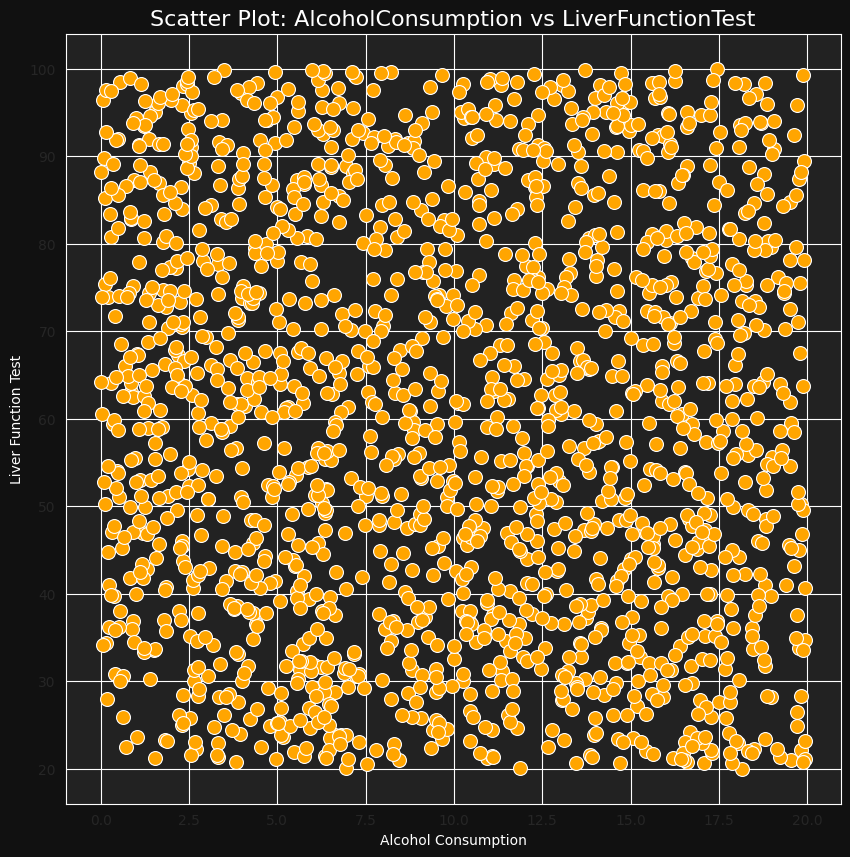

In [16]:
import matplotlib.pyplot as plt # Re-import matplotlib.pyplot
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
sns.scatterplot(x='AlcoholConsumption', y='LiverFunctionTest', data=df,color='orange',s=100,edgecolor='white')
#plt.title("Scatter Plot: AlcoholConsumption vs LiverFunctionTest")
plt.title("Scatter Plot: AlcoholConsumption vs LiverFunctionTest", fontsize=16, color='white')
plt.xlabel("Alcohol Consumption", color='white')
plt.ylabel("Liver Function Test", color='white')
plt.gca().set_facecolor("#222222")   # chart area
plt.gcf().set_facecolor("#111111")
plt.show()

The scatter plot shows the relationship between Alcohol Consumption (x-axis) and Liver Function Test values (y-axis).

	•	The points are widely scattered, and there is no strong linear correlation between alcohol intake and liver function test results.
	•	Individuals with both low and high alcohol consumption can be found across the full range of liver function test values (20–100).
	•	This suggests that alcohol consumption alone may not be a sufficient predictor of liver function; other factors (such as genetics, BMI, or comorbidities) may play a more significant role

In [18]:
plt = px.bar(df["GeneticRisk"].value_counts().reset_index(), x="GeneticRisk",y="count", title="GeneticRisk Distribution",color="GeneticRisk", color_discrete_sequence=px.colors.sequential.Magenta_r)
plt.update_layout(
    title_x=0.5,
    template="plotly_dark",
    width=800,
    height=600
)
plt.show()

The bar plot illustrates the distribution of Genetic Risk among participants:

	•	Level 0 (Low risk): Represents the largest group, with around 950 individuals.
	•	Level 1 (Medium risk): Includes about 550 individuals.
	•	Level 2 (High risk): Represents the smallest group, with less than 200 individuals.

This shows that most patients fall into the low genetic risk category, while only a minority are classified as high risk

In [20]:
plt = px.pie(df, names="Diagnosis", title="Diagnosis Distribution", color_discrete_sequence=px.colors.sequential.Magenta_r)
plt.update_layout( title_x=0.5, template="plotly_dark", width=800, height=600 )
plt.show()

The pie chart shows that the data is fairly balanced, with only a small difference (around 10%) between the two diagnosis groups. This balance is good because it means that any predictive models trained on this dataset are less likely to be biased toward one class.

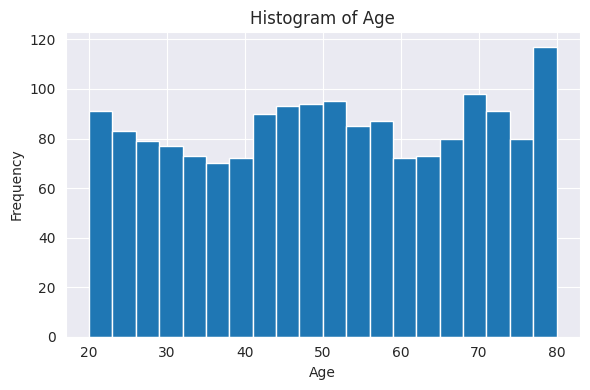

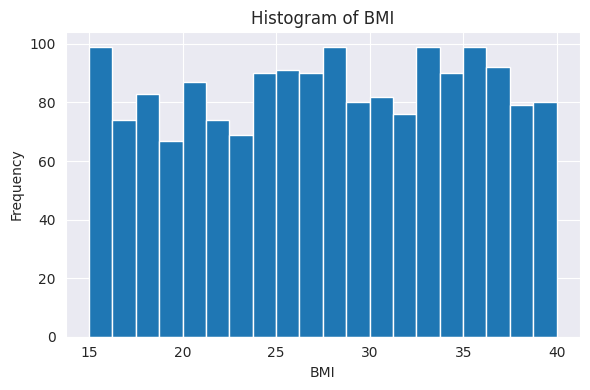

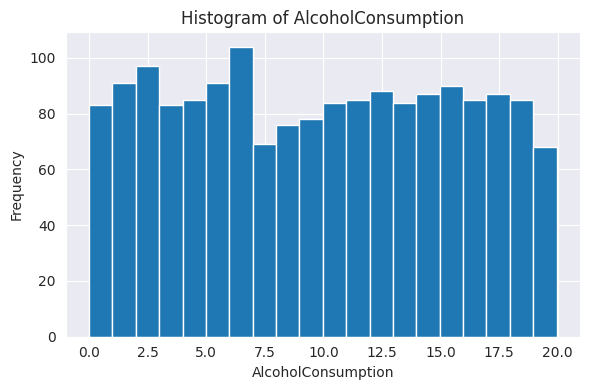

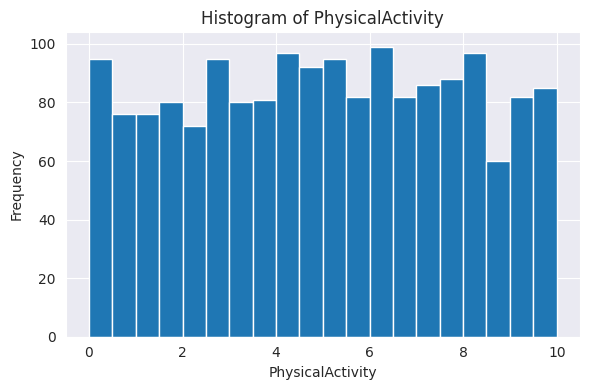

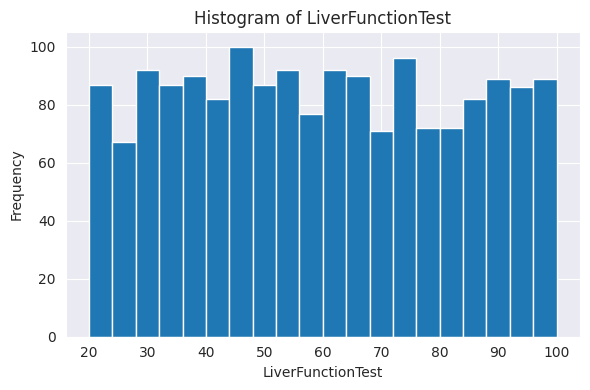

In [21]:
numeric_cols = ['Age','BMI','AlcoholConsumption','PhysicalActivity','LiverFunctionTest']

import matplotlib.pyplot as plt # Re-importing matplotlib.pyplot

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=20)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

	•	Age: The distribution is fairly uniform across the range 20–80, with slightly higher counts in older age groups (around 70–80).
	•	BMI: Values spread between 15–40, with most individuals clustered around 25–30, indicating many are overweight.
	•	Alcohol Consumption: Ranges 0–20 units per week, with a balanced spread, showing both non-drinkers and heavy drinkers.
	•	Physical Activity: Distributed between 0–10 hours/week, with many participants engaging in low to moderate activity.
	•	Liver Function Test: Spans from 20 to 100, with a peak around 60, reflecting varied liver health conditions.


In [22]:
df.isnull().sum()

,0
Age,0
Gender,0
BMI,0
AlcoholConsumption,0
Smoking,0
GeneticRisk,0
PhysicalActivity,0
Diabetes,0
Hypertension,0
LiverFunctionTest,0


The dataset contains no missing values, so no imputation was required.

##-***DATA PREPROCESSING***

In [4]:
Preprocessed_dataset = df.copy()  #we'll work on this copy

#Normalization
columns_to_normalize = ['BMI', 'AlcoholConsumption', 'PhysicalActivity', 'LiverFunctionTest']
data_to_normalize = Preprocessed_dataset[columns_to_normalize]

minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)


Preprocessed_dataset[columns_to_normalize] = normalized_data_minmax


**Normalization**

We normalized numeric attributes (BMI, AlcoholConsumption, PhysicalActivity, LiverFunctionTest) using Min-Max scaling. This step was applied because the values in these attributes are in very different ranges. Normalization makes all values between 0 and 1, so no attribute will have more influence than the others when we apply algorithms in the next phase.

In [6]:
#Discretization

column_to_discretize = 'Age'
num_bins = 3

Preprocessed_dataset['discretized_' + column_to_discretize] = pd.cut(
    Preprocessed_dataset[column_to_discretize],
    bins=num_bins,
    labels=False
)

# Bin ranges:
# Bin 0: (19.94, 40.0]
# Bin 1: (40.0, 60.0]
# Bin 2: (60.0, 80.0]



**Discretization**

We applied discretization on the Age column by dividing it into 3 bins. The reason is that sometimes continuous values are not easy to use in later analysis or models. Grouping age into ranges makes the data easier to compare and helps us understand it better when performing classification or clustering.

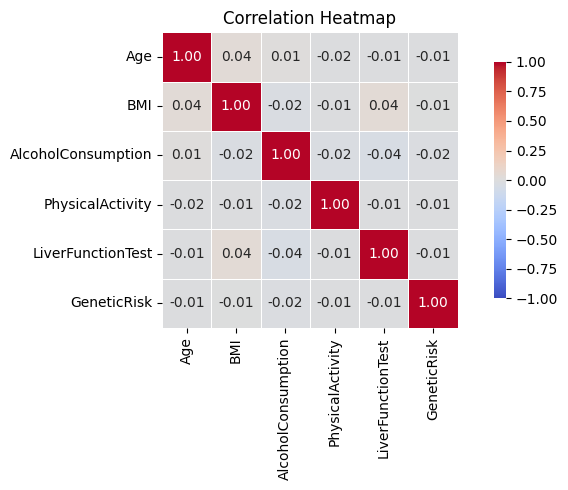

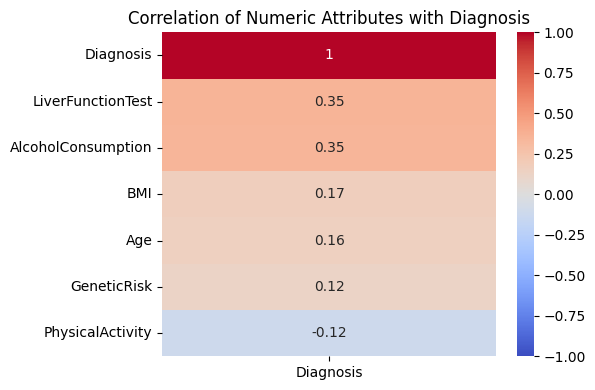

In [7]:
#  Feature Selection (correlation Coefficient)
#check numric attributes
cols_for_corr = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'LiverFunctionTest', 'GeneticRisk']
corr_matrix = Preprocessed_dataset[cols_for_corr].corr()


plt.figure(figsize=(8,5))
sns.heatmap(
     corr_matrix, annot=True, fmt=".2f",
     cmap="coolwarm", vmin=-1, vmax=1, center=0,
     square=True, linewidths=0.5, cbar_kws={"shrink": .8}
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()



# Check correlation with the class label(Diagnosis)
target_corr = Preprocessed_dataset[cols_for_corr + ['Diagnosis']].corr()['Diagnosis'].sort_values(ascending=False)


plt.figure(figsize=(6,4))
sns.heatmap(
    Preprocessed_dataset[cols_for_corr + ['Diagnosis']].corr()[['Diagnosis']].sort_values(by='Diagnosis', ascending=False),
    annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0
)
plt.title("Correlation of Numeric Attributes with Diagnosis")
plt.tight_layout()
plt.show()

**Feature Selection (Correlation Coefficient)**

We used the correlation coefficient to check redundancy among numeric features. We also checked their relationship with the class label.
The results showed weak correlations, so we kept all the columns and didn’t remove any.

In [8]:
#feature selection(chi square)
#check categorical attributes

categorical_columns = ['Gender', 'Smoking', 'GeneticRisk', 'Diabetes', 'Hypertension']


results = []

for col in categorical_columns:
    contingency_table = pd.crosstab(Preprocessed_dataset[col], Preprocessed_dataset['Diagnosis'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    results.append({
        'Feature': col,
        'Contingency Table': contingency_table.to_html(classes="mini", border=1),
        'Chi-Square Statistic': round(chi2_stat, 4),
        'Degrees of Freedom': dof,
        'Expected Frequencies': (expected.round(2)).tolist()
    })

chi_df = pd.DataFrame(results)

display(
    chi_df.style.set_caption("Chi-Square Test Results")
    .set_table_styles([{
        'selector': 'caption',
        'props': [('font-size', '16px'), ('font-weight', 'bold')]
    }])
    .background_gradient(subset=['Chi-Square Statistic'], cmap='Greys')
)


**Feature Selection (Chi-Square )**

We used the chi-square test to check the relationship between the categorical features and diagnosis. The results showed high chi-square values for all categorical features, so we kept all columns and didn’t remove any.

**Preprocessing Summary**

In this part, we prepared the dataset to make it ready for analysis.
First, we created a copy of the original data to keep it safe, then we started the preprocessing steps.

We began with Normalization, where we scaled numeric columns such as BMI, AlcoholConsumption, PhysicalActivity, and LiverFunctionTest using Min-Max scaling. This step made all numeric values fall between 0 and 1, which helps balance the effect of features with different value ranges.

Next, we applied Discretization to the Age column by dividing it into three groups. This helped turn continuous age values into categories, making comparisons easier in later analysis.

Then, we used Feature Selection to check which attributes were more related to the Diagnosis column.
For numeric columns, we used the correlation coefficient, and since the correlations were weak, we kept all of them.
For categorical columns like Gender, Smoking, GeneticRisk, Diabetes, and Hypertension, we used the Chi-Square test and found they had significant relationships, so we also kept them all.

Finally, we compared the raw and preprocessed datasets. The processed version showed normalized values and a new discretized Age column, confirming that the preprocessing was done successfully.

In [9]:
# Snapshot of original and processed data

print("Raw Data:")
display(df.head())

print("Preprocessed Data:")
display(Preprocessed_dataset.head())

Raw Data:


,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


Preprocessed Data:


,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis,discretized_Age
0,58,0,0.834511,0.865674,0,1,0.065754,0,0,0.284036,1,1
1,71,1,0.629409,0.110159,0,1,0.166986,1,0,0.591338,1,2
2,48,0,0.198762,0.927238,0,0,0.993330,0,0,0.546687,0,1
3,34,1,0.064459,0.633080,0,0,0.563216,0,0,0.556902,1,0
4,62,1,0.042465,0.054344,0,1,0.356682,1,0,0.723370,1,2


**Snapshot of Original and Preprocessed Data**

The tables show the data before and after preprocessing
The raw data has the original values, while the preprocessed data includes normalized values (0–1) and a new discretized age column.
This shows that the preprocessing was done successfully.

In [10]:
Preprocessed_dataset.to_csv("Preprocessed_dataset.csv", index=False)